<a href="https://colab.research.google.com/github/GurgenGulay/Turkcell_deeplearning_201_ANN_UYGULAMA/blob/main/Turkcell_deeplearning_201_ANN_UYGULAMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yapay Sinir Ağları (ANN) ile Rakam Tanıma


1.   İş Problemi (Business Problem)
2.   Veriyi Anlamak (Data Understanding)
3.   Veriyi Hazırlamak (Data Preparation)
4.   Modelleme (Modeling)
5.   Değerlendirme (Evaluation)



# İş Problemi (Business Problem)



*   Yapay sinir ağlarını kullanarak insan gücü kaynağının nasıl daha verimli kullanılacağı ele alınıyor.


mnist

28'e 28 piksel



# Veriyi Anlamak (Data Understanding)



In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings('ignore')

In [ ]:
# Mnist veri setinin yüklenmesi
(x_train, y_train), (x_test, y_test) = mnist.load_data()   # x = piksel(bağımsız değişken, bu veri setimizde 28'28 pikseller) , y = çıktı(bağımlı değişken,target, bu veri setimizde sayılarımız)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print("Eğitim Seti Boyutu:", x_train.shape, y_train.shape)

Eğitim Seti Boyutu: (60000, 28, 28) (60000,)


In [ ]:
print("Test Seti Boyutu:", x_test.shape, y_test.shape)

Test Seti Boyutu: (10000, 28, 28) (10000,)


In [ ]:
num_labels = len(np.unique(y_train))
num_labels

10

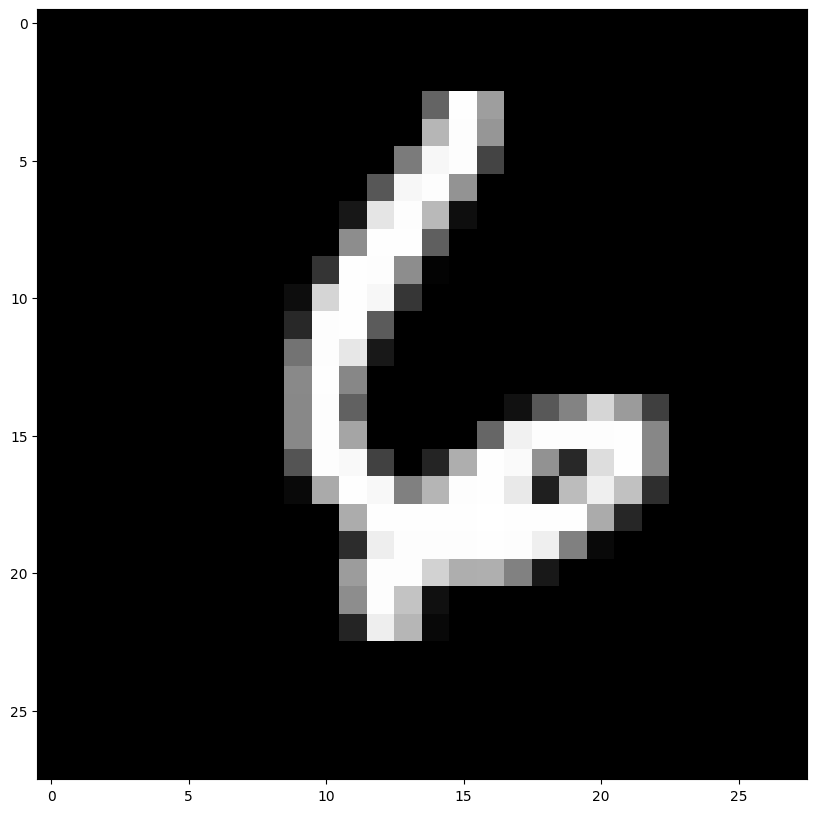

In [ ]:
# Veri Setinden Örnekler Gösterilmesi

plt.figure(figsize=(10, 10))  # notebooka gösterecek olduğuum görselin boyutları 10'a 10 olsun dedik
plt.imshow(x_train[59000], cmap='gray');  # kaçıncı görseli görmek istediğimizi yazıyoruz.


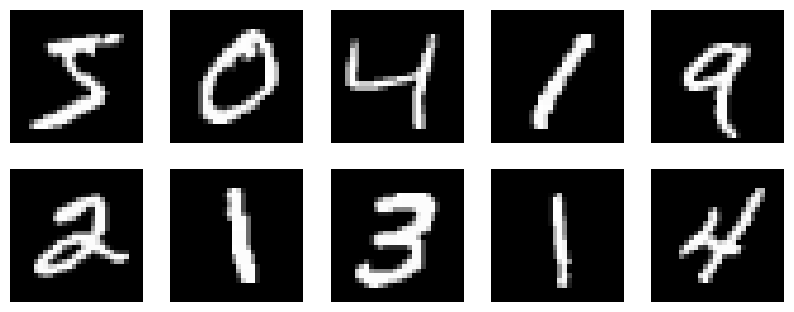

In [ ]:
# Bir resim değilde diyelim ki 10 tane resim görmek istedik.
plt.figure(figsize=(10, 10))
for n in range(10):  # 0 dan 10 a kadar sayıları gez
  ax = plt.subplot(5,5,n+1)  # 5 tane satır, 5 tane sütun olsun , n'i her defasında 1 arttır.
  plt.imshow(x_train[n], cmap='gray')
  plt.axis('off')  # eksen bilgisi istemediğimiz için off diyoruz.

In [ ]:
# Yukarıda yaptığımızı fonksiyon olarak tanımlayalım
def visualize_img(data):
  plt.figure(figsize=(10,10))
  for n in range(10):
    ax = plt.subplot(5,5,n+1)
    plt.imshow(x_train[n], cmap='gray')
    plt.axis('off')

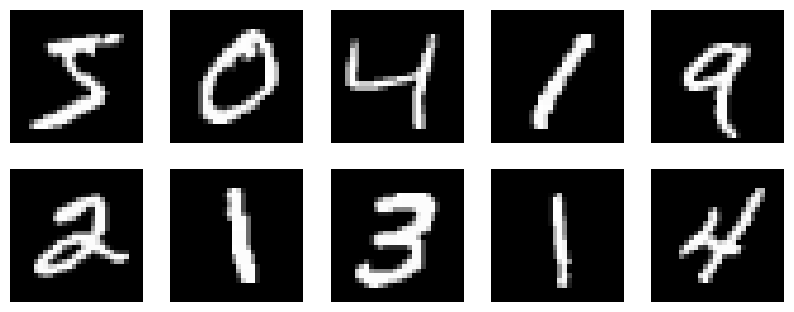

In [ ]:
visualize_img(x_train)

In [ ]:
# fonksiyon olarak tanımlayalım
def visualize_img(data):
  plt.figure(figsize=(10,10))
  for n in range(10):
    ax = plt.subplot(5,5,n+1)
    plt.imshow(data[n], cmap='gray')
    plt.axis('off')

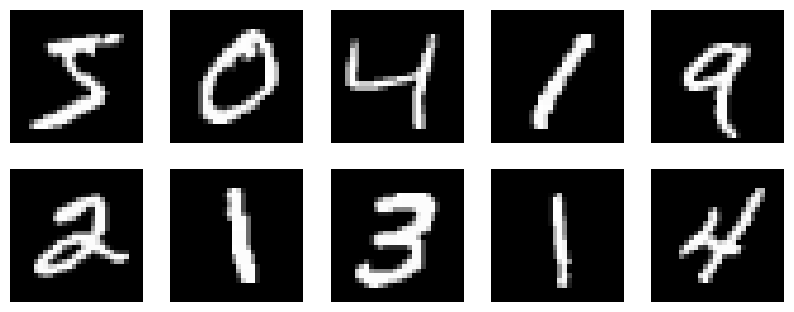

In [ ]:
visualize_img(x_train)

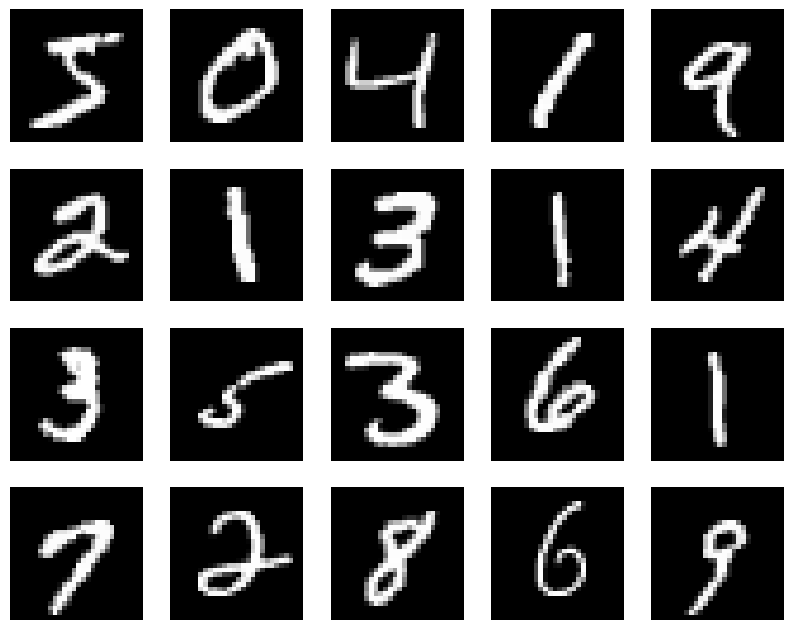

In [ ]:
# fonksiyon olarak tanımlayalım bu sefer kaç tane göstereceğini dışarıdan belirledik
def visualize_img2(data, x):
  plt.figure(figsize=(10,10))
  for n in range(x):
    ax = plt.subplot(5,5,n+1)
    plt.imshow(data[n], cmap='gray')
    plt.axis('off')

visualize_img2(x_train, 20)

# Veriyi Anlamak 2 (Önemli)
Görsellerin sayılarla temsilinin nasıl gerçekleştirileceğinin anlatılması.

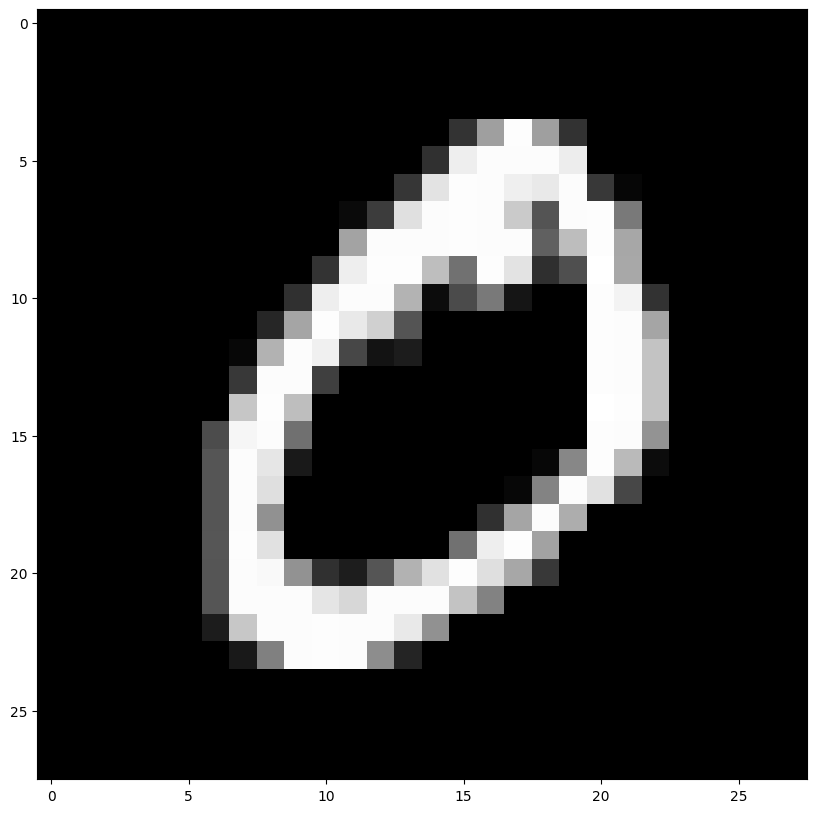

In [ ]:
# Veri Setinden Örnekler Gösterilmesi

plt.figure(figsize=(10, 10))  # notebooka gösterecek olduğuum görselin boyutları 10'a 10 olsun dedik
plt.imshow(x_train[1], cmap='gray');  # kaçıncı görseli görmek istediğimizi yazıyoruz.


Bir bilgisayar ekranda resim göstermek istediğinde aslın 3 rengi temel alır.RGB renklerini kullanır ve bütün renkler bunlar üzerinden oluşturulur.

*   RGB(Red, Green, Blue)
*   r:250 g:10 b:240 mor renge karşılık gelmektedir.
*   r:250 g:0 b:250 daha koyu bir mor.

RGB kodları 0 ile 255 arasında sayılar alır.





In [ ]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [ ]:
x_train[2].shape

(28, 28)

In [ ]:
x_train[2][10, 10]

0

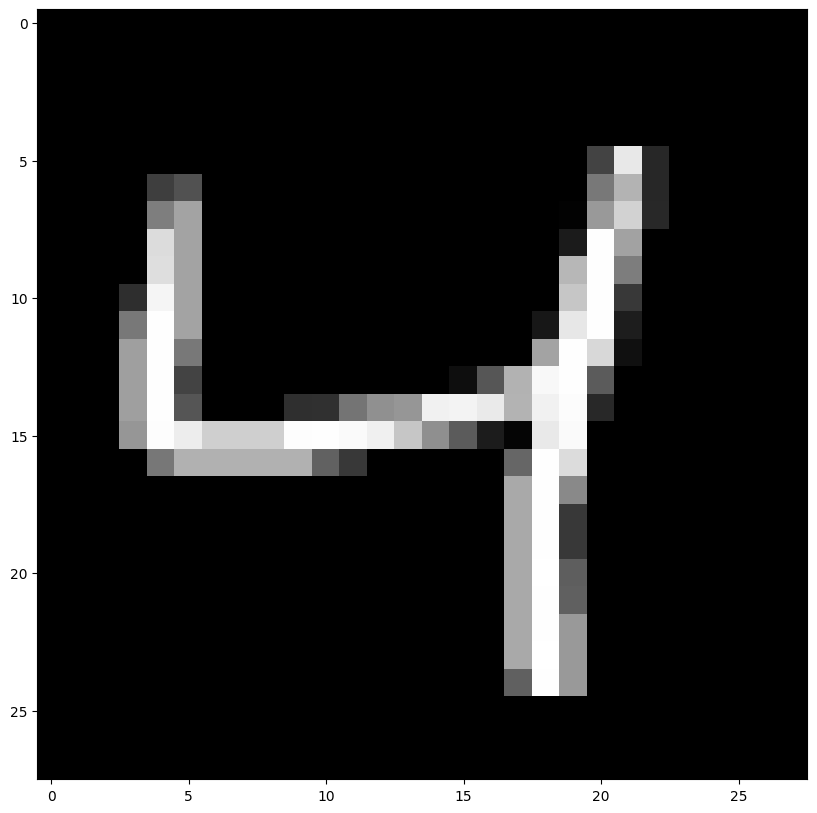

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(x_train[2], cmap='gray');

In [ ]:
x_train[2][15, 4]

253

In [ ]:
x_train[2].mean()

24.799744897959183

In [ ]:
x_train[2].sum()

19443

In [ ]:
x_train[2][14:20, 10:20]

array([[ 49, 116, 144, 150, 241, 243, 234, 179, 241, 252],
       [254, 250, 240, 198, 143,  91,  28,   5, 233, 250],
       [ 98,  56,   0,   0,   0,   0,   0, 102, 254, 220],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254, 137],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57]], dtype=uint8)

In [ ]:
x_train[2][14:20, 10:20].mean()

96.51666666666667

In [ ]:
# Verdiğimiz görseldeki RGB kodlarını görselleştiren bir fonksiyon yazalım.
def pixel_visualize(img):
  fig = plt.figure(figsize=(12,12))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')
  width, height = img.shape

  threshold = img.max() / 2.5

  for x in range(width):
    for y in range(height):

      ax.annotate(str(round(img[x][y], 2)), xy=(y,x),
                  color='white' if img[x][y]<threshold else 'black')

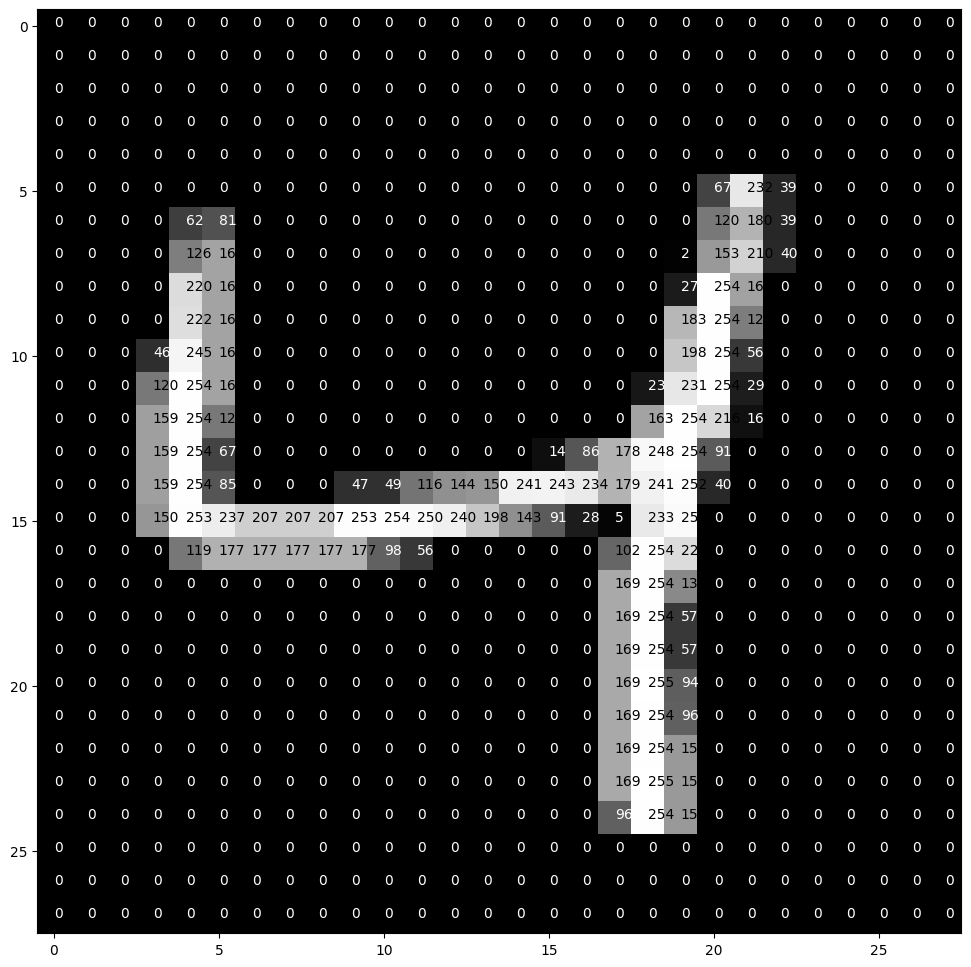

In [ ]:
pixel_visualize(x_train[2])

# Veriyi Hazırlama (Data Preparation)
Veri setinde bağımlı değişkene(diğer bir ifadeyle; label, output,hedef değişkene) encoding işleminin nasıl uygulanacağı ele alınıyor.

**Encoding**


*   Önce:  [0 1 2 3 4 5 6 7 8 9]
*   Sonra: [0 0 1 0 0 0 0 0 0 0]



In [ ]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
# one hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

**Reshaping**

Veri setinde yeniden şekillendirme işleminin nasıl uygulanacağı ele alınıyor.

In [ ]:
image_size = x_train.shape[1]

In [ ]:
image_size

28

In [ ]:
print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_train boyutu: (60000, 28, 28)
x_test boyutu: (10000, 28, 28)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) # 1 görsellerdeki resimlerin piksellerinin değerlerini tutuyor.
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_train boyutu: (60000, 28, 28, 1)
x_test boyutu: (10000, 28, 28, 1)


**Normalization / Standardization**

Veri setinde standartlaştırma işleminin nasıl uygulanacağı ele alınıyor.

Yapma sebebimiz: 0 ile 255 arasında değer alan sayıları 0 ile 1 arasına çekmemizin bazı sebepleri var. Bunlar eğitim süresinin daha hızlı ve öğrenme sürecinin daha doğru bir şekilde yada sonuca daha hızlı gidebilecek şekilde gerçekleşmesini sağlamaya çalışmaktır.

Bu durumda sinir ağının öğrenme süreci pozitif anlamda etkilenmektedir.

en kolay yolu 255'e bölmek.




In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# **Modelleme**
Sinir ağı mimarisinin tanımlayarak model kurma işleminin nasıl gerçekleşeceğinin anlatılması.

# Sinir Ağı Mimarisini Tanımlamak

In [ ]:
# Binanın dışı dış özellikleri gibi düşünelim
model = tf.keras.Sequential([   #Sequential sıralı katman yapılarını kullanabilmemize imkan sağlar.
    Flatten(input_shape=(28, 28, 1)),   # inputun şekillendiği 1.katman flatten katmanı
    Dense(units=128, activation='relu', name='layer1'),  # Hidden layer, units nöron demek.Nöron sayımızı 128 dedik bunu resimlerden çkarılacak feature sayısı olarak düşünebiliriz.relu fonk gizli katmanlarda kullanılması gereken bir fonks.
    Dense(units=num_labels, activation='softmax', name='output_layer')])   # Son çıkış katmanı.Elimizde 10 sınıf var çok sınıflı bir sınıflandırma problemi old. dolayı softmax fonk. kullanılır. 2 sınıf olsaydı sigmoid fonk. kullanılırdı.


# Binanın içi sayısal kısmı
model.compile(loss='categorical_crossentropy',  # loss hata değerlendirme metriğidir. Amaç bu fonksiyonu minimize etmektir. 2'den fazla sınıf olduğunda categorical_crossentropy
              optimizer='adam',   #loss fonksiyonunu optimize(minimize) edicek olan optimizasyon algoritmasıdır.
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])  # loss'u minimize ederken gidiş yolumuzu belirlemek için hata metriklerine bakabiliriz.

In [ ]:
# yukarıda modeli tanımlamış olduk. summary ile bilgilerine bakalım.
model.summary()  # 100480 sayısı şuradan geliyor: 28'e 28 resimlerimiz vardı bunlarda 784 piksel yapar. 128 nöron yani her bir piksel için 128 özellik olacak 128*784'den gelir.100480 bizim bulmamız gereken parametre sayısıdır.
# çıkış katmanımızın 1290 parametre olma sebebi: 10 tane fotoğrafımız var ve 128 tane nöron(özellik) ile değerlendiriliyor. 128*10=1280. +10 değerimiz de bias değerlerinden geliyor.Dolayısıyla 1290 tane parametre bulunması gerekiyor.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________




*   epochs sayısı kaç tur atması gerektiğini kaç kere optimizasyon işlemini yapması gerektiğini ifade eder. 5 tur dön diyoruz.
*   batch_size: her iterasyonda 128 tane gözlem birimine odaklanarak ilgili optimizasyon yöntemine dayalı olarak gradyanlar türevleri hesaplanacak ve bir sonraki epoch'a geçilecek.



In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 7s 12ms/step - loss: 0.3555 - precision: 0.9458 - recall: 0.8508 - accuracy: 0.9017 - val_loss: 0.1942 - val_precision: 0.9597 - val_recall: 0.9339 - val_accuracy: 0.9471
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.1635 - precision: 0.9651 - recall: 0.9436 - accuracy: 0.9536 - val_loss: 0.1309 - val_precision: 0.9709 - val_recall: 0.9548 - val_accuracy: 0.9629
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1165 - precision: 0.9742 - recall: 0.9601 - accuracy: 0.9668 - val_loss: 0.1100 - val_precision: 0.9755 - val_recall: 0.9638 - val_accuracy: 0.9690
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0907 - precision: 0.9790 - recall: 0.9690 - accuracy: 0.9738 - val_loss: 0.0954 - val_precision: 0.9769 - val_recall: 0.9682 - val_accuracy: 0.9724
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0726 - precision: 0.9833 - re

# Model Başarı Değerlendirme (Evaluation)
Model sonuçlarının değerlendirilmesi ve kurulan modelin başarı metriklerine göre raporlanmasının anlatılması.

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0602 - precision: 0.9860 - recall: 0.9796 - accuracy: 0.9827 - val_loss: 0.0864 - val_precision: 0.9774 - val_recall: 0.9713 - val_accuracy: 0.9748
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0504 - precision: 0.9883 - recall: 0.9833 - accuracy: 0.9857 - val_loss: 0.0825 - val_precision: 0.9777 - val_recall: 0.9720 - val_accuracy: 0.9736
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0427 - precision: 0.9904 - recall: 0.9861 - accuracy: 0.9882 - val_loss: 0.0752 - val_precision: 0.9798 - val_recall: 0.9742 - val_accuracy: 0.9765
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0361 - precision: 0.9921 - recall: 0.9884 - accuracy: 0.9902 - val_loss: 0.0700 - val_precision: 0.9807 - val_recall: 0.9771 - val_accuracy: 0.9785
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0311 - precision: 0.9929 - r

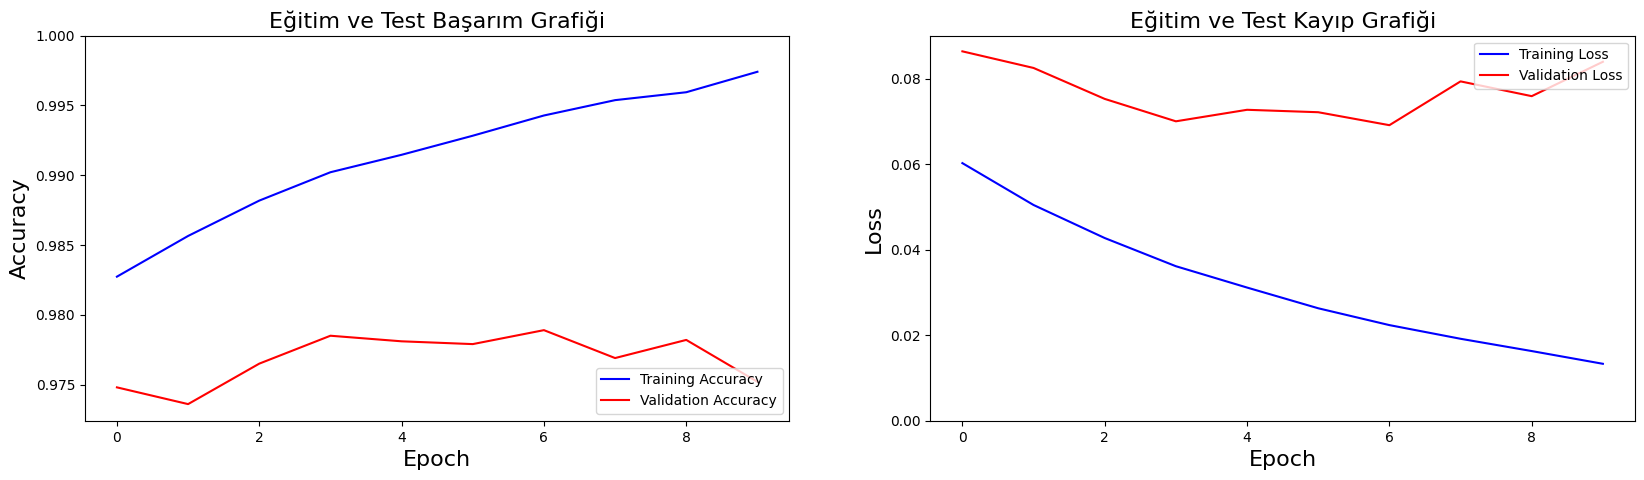

In [ ]:
##############################
# Accuracy ve Loss Grafikleri
##############################

#-------------------------- Grafik 1 Accuracy ----------------------------------

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Eğitim ve Test Başarım Grafiği', fontsize=16)

#-------------------------- Grafik 2 Loss ----------------------------------

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Eğitim ve Test Kayıp Grafiği', fontsize=16)
plt.show()

In [ ]:
loss, precision, recall, acc = model.evaluate(x_test, y_test, verbose=False)
print("\nTest Accuracy: %.lf%%" % (100.0 * acc))
print("\nTest Loss: %.lf%%" % (100.0 * loss))
print("\nTest Precision: %.lf%%" % (100.0 * precision))
print("\nTest Recall: %.lf%%" % (100.0 * recall))


Test Accuracy: 98%

Test Loss: 8%

Test Precision: 98%

Test Recall: 97%


# Tahmin

Veriden rastgele örnek seçerek modele sorup başarısının gözlemlenmesi ele alınıyor.

# **Modelin Kaydedilmesi ve Tahmin İçin Kullanılması**

In [ ]:
model.save('m.nist_model.h5')

In [ ]:
import random
random = random.randint(0, x_test.shape[0])

In [ ]:
random

3078

In [ ]:
test_image = x_test[random]

In [ ]:
y_test[random]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

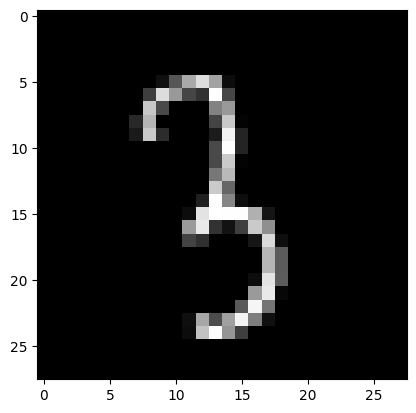

In [ ]:
plt.imshow(test_image.reshape(28, 28), cmap='gray');

In [ ]:
test_data = x_test[random].reshape(1,28,28,1)

In [ ]:
probability = model.predict(test_data)

1/1 [==============================] - 0s 158ms/step


In [ ]:
probability

array([[2.2322475e-07, 1.3126111e-05, 1.6356536e-05, 9.9514198e-01,
        2.7269367e-08, 1.9939065e-05, 5.4565295e-08, 1.2828381e-05,
        4.7433069e-03, 5.2185806e-05]], dtype=float32)

In [ ]:
predicted_classes = np.argmax(probability)

In [ ]:
predicted_classes

3

In [ ]:
print(f"Tahmin Edilen Sınıf: {predicted_classes} \n")
print(f"Tahmin Edilen Sınıfın Olasılık Değeri: {(np.max(probability, axis=-1))[0]} \n")
print(f"Diğer Sınıfların Olasılık Değerleri: \n{probability}")

Tahmin Edilen Sınıf: 3 

Tahmin Edilen Sınıfın Olasılık Değeri: 0.9951419830322266 

Diğer Sınıfların Olasılık Değerleri: 
[[2.2322475e-07 1.3126111e-05 1.6356536e-05 9.9514198e-01 2.7269367e-08
  1.9939065e-05 5.4565295e-08 1.2828381e-05 4.7433069e-03 5.2185806e-05]]
